In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import sklearn

german = pd.read_csv("german_credit_data.csv")

In [17]:
german=german.drop(["Checking account"],axis=1)
german.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,1169,6,radio/TV
1,1,22,female,2,own,little,5951,48,radio/TV
2,2,49,male,1,own,little,2096,12,education
3,3,45,male,2,free,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,4870,24,car


In [18]:
german["Saving accounts"]=german["Saving accounts"].fillna("quite little")
german["Saving accounts"]

0      quite little
1            little
2            little
3            little
4            little
           ...     
995          little
996          little
997          little
998          little
999        moderate
Name: Saving accounts, Length: 1000, dtype: object

In [19]:
german["Saving accounts"]=german["Saving accounts"].map({"quite little": 0, "little": 1, "moderate": 2,"rich": 3, "quite rich": 4})
german.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,0,67,male,2,own,0,1169,6,radio/TV
1,1,22,female,2,own,1,5951,48,radio/TV
2,2,49,male,1,own,1,2096,12,education
3,3,45,male,2,free,1,7882,42,furniture/equipment
4,4,53,male,2,free,1,4870,24,car


In [20]:
german["Purpose"]=german["Purpose"].map({"radio/TV": 0, "education": 1, "furniture/equipment": 2, "car" : 3})
german["Sex"]=german["Sex"].map({"male": 1, "female": 0})
german["Housing"]=german["Housing"].map({"own": 0, "free": 1, "rent": 2})
german.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,0,67,1,2,0,0,1169,6,0.0
1,1,22,0,2,0,1,5951,48,0.0
2,2,49,1,1,0,1,2096,12,1.0
3,3,45,1,2,1,1,7882,42,2.0
4,4,53,1,2,1,1,4870,24,3.0


In [21]:
german = pd.DataFrame(german)

german.to_csv('data1.csv', index=False)

In [22]:
# посчитаем дисперсию всех числовых переменных
german.var()

Unnamed: 0         8.341667e+04
Age                1.294013e+02
Sex                2.141141e-01
Job                4.272112e-01
Housing            6.074515e-01
Saving accounts    1.003979e+00
Credit amount      7.967843e+06
Duration           1.454150e+02
Purpose            1.662624e+00
dtype: float64

In [23]:
german=german.drop(["Unnamed: 0"],axis=1)
german.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,1,2,0,0,1169,6,0.0
1,22,0,2,0,1,5951,48,0.0
2,49,1,1,0,1,2096,12,1.0
3,45,1,2,1,1,7882,42,2.0
4,53,1,2,1,1,4870,24,3.0


In [24]:
numeric = german[['Age','Sex','Job','Housing','Saving accounts','Credit amount','Duration','Purpose']]
var = numeric.var()
numeric = numeric.columns

variable = [ ]

for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i])

In [25]:
variable

['Age', 'Credit amount', 'Duration']

In [26]:
german1 = german[variable]
german1

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [27]:
german1.corr()

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


<AxesSubplot:>

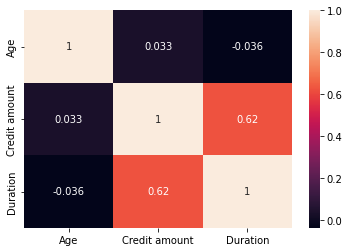

In [28]:
# визуализируем коэффициенты корреляции
sns.heatmap(german1.corr(),annot=True)

In [29]:
test_data = german.drop("Sex", axis=1)
test_data = test_data.drop("Job", axis=1)
test_data = test_data.drop("Housing", axis=1)
test_data = test_data.drop("Saving accounts", axis=1)
test_data = test_data[variable]
test_data.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


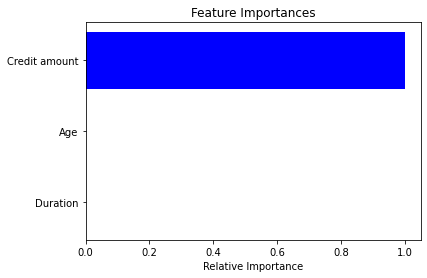

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
german1=pd.get_dummies(german1)
model.fit(german1, test_data)
# график важности функции

features = german1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

          Age  Credit amount  Duration
298  0.428571       0.124629  0.250000
160  0.303571       0.144272  0.357143
268  0.464286       0.480247  0.178571
658  0.160714       0.218499  0.464286
996  0.375000       0.198470  0.464286


MinMaxScaler()

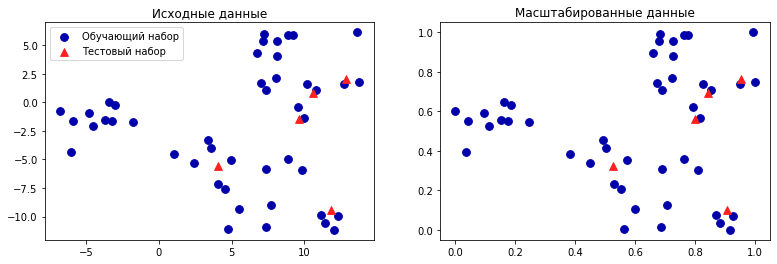

In [31]:
#Масштабирование или стандартизация объектов: это этап предварительной обработки данных,
#который применяется к независимым переменным или признакам данных.
#Это в основном помогает нормализовать данные в определенном диапазоне.




"In[3]:"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(german1,  german1, random_state=1)

"In[4]:"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

"In[5]:"
scaler.fit(X_train)

"In[6]:"
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training

print(X_train_scaled.head())
data2 = X_train_scaled
df = pd.DataFrame(data2)
df.to_csv('data2.csv', index=False)

"In[8]:"
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
c=mglearn.cm2(0), label="Обучающий набор", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
c=mglearn.cm2(1), label="Тестовый набор", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Исходные данные")
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="Обучающий набор", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Тестовый набор", s=60)
axes[1].set_title("Масштабированные данные")
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
#маштабируем данные и тестовые, и обучающие


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve


y1 = german1["Age"].astype("int") 
X1 = german1.drop("Age", axis=1)

y2 = data2["Age"].astype("int") 
X2 = data2.drop("Age", axis=1)

#метод ближайших соседей
knn_1 = KNeighborsClassifier(n_neighbors=1)
#криваия обучаемости
knn_1_size, knn_1_train, knn_1_test = learning_curve(knn_1, X1, y1)
print('knn_1_size: ', knn_1_size)

knn_2 = KNeighborsClassifier(n_neighbors=1)
knn_2_size, knn_2_train, knn_2_test = learning_curve(knn_2, X2, y2)
print('knn_1_size: ', knn_2_size)

C:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


knn_1_size:  [ 80 260 440 620 800]


C:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


knn_1_size:  [ 60 195 330 465 600]


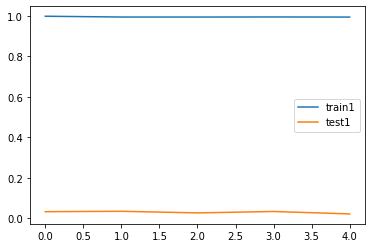

In [33]:
plt.plot(knn_1_train.mean(axis=0), label='train1')
plt.plot(knn_1_test.mean(axis=0), label='test1')
plt.legend()
plt.show()

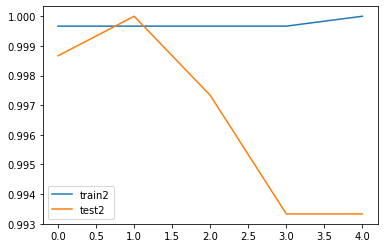

In [34]:
plt.plot(knn_2_train.mean(axis=0), label='train2')
plt.plot(knn_2_test.mean(axis=0), label='test2')
plt.legend()
plt.show()